## Final Project Submission

Please fill out:
* Student name: Carolyne Wambui Kambura
* Student pace: Part Time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# ANALYSIS OF THE MOVIE INDUSTRY FOR POTENTIAL MICROSOFT  VENTURE

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# PROJECT OVERVIEW

On this project, I wanted to analyze the data from a financial view point. With the databases given from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers, I focused on answering the following questions:
1. What were the movie trends from 2010 - 2018 (i.e. how many movies per genre were produce each year)
2. Which were the highest rated genres 
3. Which genres had the highest production budget
4. Was there a correlation betwee production budget and runtime
5. Was there a correlation between production budget and World wide gross profit
6. Which genre had the highest Estimated gross profit
7. Was there a correlation between domestic gross profit and foreign gross profit

From the analysis, the results will help Microsoft understand: 
1. Which genres to focus on in terms of averageratings and estimated gross profit 
2. Production budgets for each genres
3. How production budget translates to gross profit
4. The correlation between how a movie performs domestically and internationally

# Data Sources
Box Office Mojo
IMDBLinks 
Rotten Tomatoes
TheMovieDB
The Numbers

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [15]:
#confirm I have all the data uploaded
!ls

CONTRIBUTING.md
LICENSE.md
README.md
Untitled.ipynb
awesome.gif
bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
student.ipynb
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
zippedData


# DATA PREPARATION

A. Step 1: Review Data i.e. What makes up the datasets?

What information is available from the different data sources? Will the data in these data sources help me come up with insights that will help microsoft make a decision on the type of movies to make?

1. Box Office Mojo 

In [3]:
df_bom_gross = pd.read_csv("bom.movie_gross.csv.gz")

In [56]:
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
df_bom_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [7]:
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


2. IMDB

In [5]:
df_imdb_name = pd.read_csv("imdb.name.basics.csv.gz")

In [23]:
df_imdb_name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [24]:
df_imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [6]:
df_imdb_title_akas = pd.read_csv("imdb.title.akas.csv.gz")

In [120]:
df_imdb_title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [28]:
df_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [7]:
df_imdb_title_bs = pd.read_csv("imdb.title.basics.csv.gz")

In [30]:
df_imdb_title_bs.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [31]:
df_imdb_title_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
df_imdb_title_crew = pd.read_csv("imdb.title.crew.csv.gz")

In [124]:
df_imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [39]:
df_imdb_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [9]:
df_imdb_title_princ = pd.read_csv("imdb.title.principals.csv.gz")

In [41]:
df_imdb_title_princ.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [42]:
df_imdb_title_princ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [10]:
df_imdb_title_rating = pd.read_csv("imdb.title.ratings.csv.gz")

In [44]:
df_imdb_title_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [45]:
df_imdb_title_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


3. Rotten Tomatoes

In [11]:
df_rt_info = pd.read_csv("rt.movie_info.tsv.gz", delimiter = "\t")

In [47]:
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [48]:
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [12]:
df_rt_reviews = pd.read_csv("rt.reviews.tsv.gz", delimiter = "\t", encoding = "latin - 1")

In [51]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [52]:
df_rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


4. TheMovieDB.org

In [13]:
df_tmdb = pd.read_csv("tmdb.movies.csv.gz")

In [54]:
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [55]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [14]:
df_tn_budget = pd.read_csv("tn.movie_budgets.csv.gz")

In [57]:
df_tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [58]:
df_tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Tables to be used
1. "tn.movie_budgets.csv.gz"
2. "bom.movie_gross.csv.gz"
3. "imdb.title.basics.csv.gz"
4. "imdb.title.akas.csv.gz"

QN 1: What are the movie trends from 2010 to 2018: i.e. number of movies produced each year, movies produced per year per studio and Gross trends

In [15]:
df_bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [325]:
#Check the status of the data i.e.to i.d. missing data and check on data type
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
df_bom_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [17]:
duplicates = df_bom_gross[df_bom_gross.duplicated()]
print(len(duplicates))


0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018')])

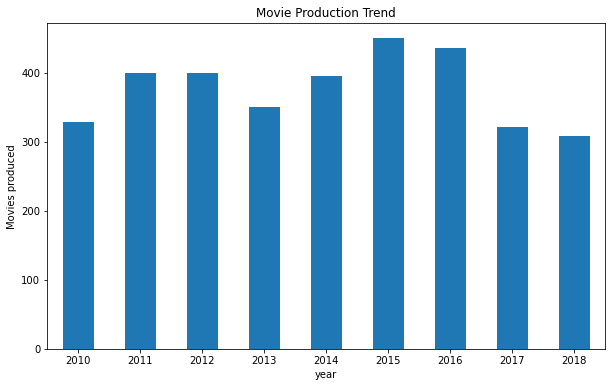

In [18]:
# count number of movies produced per year
df_bom_Production_trend = df_bom_gross.groupby(['year'])["title"].count()

#create bar plot with movie production trend
df_bom_Production_trend.plot(kind='bar', title='Movie Production Trend',
               ylabel='Movies produced', xlabel='year', figsize=(10, 6))

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

The number of movies produced each year has not been consistent. From the above numbers of movies produced has been reducing since 2015.

Mean Value for domestic_gross column: 28745845.06698422
Median Value for domestic_gross column: 1400000.0


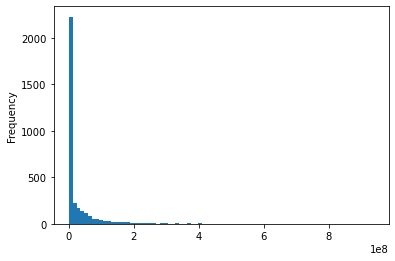

In [19]:
# Gross Domestic per Year, check to see if the data is symmetrical for a .fillna.median()
Gross_Domestic_mean = df_bom_gross['domestic_gross'].mean()
Gross_Domestic_median = df_bom_gross['domestic_gross'].median()
df_bom_gross['domestic_gross'].plot(kind='hist', bins=80)

print("Mean Value for domestic_gross column: {}".format(Gross_Domestic_mean))
print("Median Value for domestic_gross column: {}".format(Gross_Domestic_median))

In [20]:
#From the output, filling missing rows with mean or median with skew the results so with the difference in median and mean, 
#it's better to drop the rows with missing values
df_bom_dom_gross = df_bom_gross[df_bom_gross["domestic_gross"].notna()]
df_bom_dom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [21]:
#convert the "foreign_gross" column to a float
df_bom_dom_gross["foreign_gross"]=df_bom_dom_gross["foreign_gross"].map(lambda x: str(x))
import string
df_bom_dom_gross["foreign_gross"]=df_bom_dom_gross["foreign_gross"].map(lambda x: x.strip(string.punctuation))
df_bom_dom_gross["foreign_gross"]=df_bom_dom_gross["foreign_gross"].str.replace(",","").astype(float)

<ipython-input-21-f4b9f88ffe73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bom_dom_gross["foreign_gross"]=df_bom_dom_gross["foreign_gross"].map(lambda x: str(x))
<ipython-input-21-f4b9f88ffe73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bom_dom_gross["foreign_gross"]=df_bom_dom_gross["foreign_gross"].map(lambda x: x.strip(string.punctuation))
<ipython-input-21-f4b9f88ffe73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [22]:
df_bom_dom_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            3359 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.5+ KB


Mean Value for foreign_gross column: 28745845.06698422
Median Value for foreign_gross column: 28745845.06698422


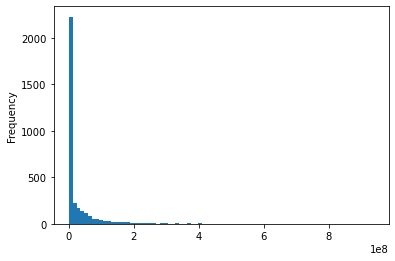

In [25]:
# Gross Foreign per Year, check to see if the data is symmetrical for a .fillna.median()
Gross_Foreign_mean = df_bom_dom_gross['domestic_gross'].mean()
Gross_Foreign_median = df_bom_dom_gross['domestic_gross'].median()
df_bom_dom_gross['domestic_gross'].plot(kind='hist', bins=80)

print("Mean Value for foreign_gross column: {}".format(Gross_Foreign_mean))
print("Median Value for foreign_gross column: {}".format(Gross_Foreign_mean))

In [26]:
#From the output, the mean and median are the same so, we can apply .fillna().mean() 
#it's better to drop the rows with missing values
df_bom_dom_gross["foreign_gross"].fillna(Gross_Foreign_mean, inplace=True)

C:\Users\zdwcxk\.conda\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
df_bom_dom_gross.isna().sum()

title             0
studio            3
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [28]:
#Drop the NaN studio
df_bom_gross_clean = df_bom_dom_gross.dropna()
df_bom_gross_clean

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,2.874585e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,2.874585e+07,2018
3384,El Pacto,Sony,2500.0,2.874585e+07,2018
3385,The Swan,Synergetic,2400.0,2.874585e+07,2018


In [29]:
# Confirm that data is clean
df_bom_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


# IMDB TITLE RATINGS

In [32]:
#Merge all IMDB data for easy data processing
imdb_rating_principal = pd.merge(df_imdb_title_princ, df_imdb_title_rating, on='tconst', how='outer') 
imdb_rating_principal_crew = pd.merge(imdb_rating_principal, df_imdb_title_crew, on='tconst', how='outer') 
imdb_rating_principal_crew_basics = pd.merge(imdb_rating_principal_crew, df_imdb_title_bs, on='tconst', how='outer') 
imdb_rating_principal_crew_basics_akas = pd.merge(imdb_rating_principal_crew_basics, df_imdb_title_akas,
                                                  left_on="tconst", right_on="title_id", how='outer')
imdb_rating_principal_crew_basics_akas_title = pd.merge(imdb_rating_principal_crew_basics_akas, df_imdb_name, 
                                                       on="nconst", how='outer')
imdb_rating_principal_crew_basics_akas_title

,tconst,ordering_x,nconst,category,job,characters,averagerating,numvotes,directors,writers,...,region,language,types,attributes,is_original_title,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1.0,nm0246005,actor,NaN,"[""The Man""]",NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2.0,nm0398271,director,NaN,NaN,NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5.0,nm0398271,director,NaN,NaN,7.8,6.0,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3.0,nm3739909,producer,producer,NaN,NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10.0,nm0059247,editor,NaN,NaN,3.9,2328.0,nm0362736,nm0362736,...,GB,NaN,working,NaN,0.0,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978138,NaN,NaN,nm9467868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Kyle Johnson,NaN,NaN,writer,NaN
2978139,NaN,NaN,nm9475692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Kathy Simmons,NaN,NaN,"camera_department,director,assistant_director","tt7713388,tt7713308"
2978140,NaN,NaN,nm9495701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Daryl Stacey Williamson,NaN,NaN,"director,actor,writer",NaN
2978141,NaN,NaN,nm9922562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Pui-Pui Leung,NaN,NaN,writer,tt5269560


In [33]:
df = imdb_rating_principal_crew_basics_akas_title
df.head()

,tconst,ordering_x,nconst,category,job,characters,averagerating,numvotes,directors,writers,...,region,language,types,attributes,is_original_title,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1.0,nm0246005,actor,NaN,"[""The Man""]",NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2.0,nm0398271,director,NaN,NaN,NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5.0,nm0398271,director,NaN,NaN,7.8,6.0,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3.0,nm3739909,producer,producer,NaN,NaN,NaN,nm0398271,nm0398271,...,AU,NaN,NaN,NaN,0.0,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10.0,nm0059247,editor,NaN,NaN,3.9,2328.0,nm0362736,nm0362736,...,GB,NaN,working,NaN,0.0,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


In [34]:
df.shape

(2978143, 28)

In [35]:
df.isna().sum()

tconst                   2358
ordering_x               5170
nconst                   2812
category                 5170
job                   2233580
characters            1827116
averagerating          521995
numvotes               521995
directors               22793
writers                268184
primary_title            2358
original_title           2390
start_year               2358
runtime_minutes        282993
genres                  34949
title_id               136867
ordering_y             136867
title                  136867
region                 597637
language              2598418
types                 1425498
attributes            2842192
is_original_title      136892
primary_name             3302
birth_year            1835363
death_year            2930366
primary_profession      95961
known_for_titles        49610
dtype: int64

In [36]:
#Dropping columns with high values of NAN
df.drop(["language", "attributes", "death_year","birth_year", "job", "characters"], axis =1, inplace=True)

In [37]:
#Drop title_id as its a repeat of the tconst and the directors and writers are  a repeat of the nconst as well
df.drop(["title_id", "directors", "writers"], axis =1, inplace=True)

In [38]:
df.head()

,tconst,ordering_x,nconst,category,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering_y,title,region,types,is_original_title,primary_name,primary_profession,known_for_titles
0,tt0111414,1.0,nm0246005,actor,NaN,NaN,A Thin Life,A Thin Life,2018.0,75.0,Comedy,1.0,A Thin Life,AU,NaN,0.0,Tommy Dysart,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2.0,nm0398271,director,NaN,NaN,A Thin Life,A Thin Life,2018.0,75.0,Comedy,1.0,A Thin Life,AU,NaN,0.0,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5.0,nm0398271,director,7.8,6.0,Remembering Nigel,Remembering Nigel,2015.0,NaN,Comedy,1.0,Remembering Nigel,AU,NaN,0.0,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3.0,nm3739909,producer,NaN,NaN,A Thin Life,A Thin Life,2018.0,75.0,Comedy,1.0,A Thin Life,AU,NaN,0.0,Barry Porter-Robinson,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10.0,nm0059247,editor,3.9,2328.0,The Wicker Tree,The Wicker Tree,2011.0,96.0,"Drama,Horror",1.0,May Day,GB,working,0.0,Sean Barton,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2978143 entries, 0 to 2978142
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   tconst              object 
 1   ordering_x          float64
 2   nconst              object 
 3   category            object 
 4   averagerating       float64
 5   numvotes            float64
 6   primary_title       object 
 7   original_title      object 
 8   start_year          float64
 9   runtime_minutes     float64
 10  genres              object 
 11  ordering_y          float64
 12  title               object 
 13  region              object 
 14  types               object 
 15  is_original_title   float64
 16  primary_name        object 
 17  primary_profession  object 
 18  known_for_titles    object 
dtypes: float64(7), object(12)
memory usage: 454.4+ MB


What is the correlation between runtime & genre?

In [38]:
runtime_genres =  df.drop(["nconst", "tconst", "ordering_x", "averagerating","category", "numvotes", "primary_title", 
        "original_title", "start_year", "ordering_y", "title", "region", "types",
       "is_original_title", "primary_name", "primary_profession", "known_for_titles"], axis =1) 

In [54]:
runtime_genres.head()

,runtime_minutes,genres
0,75.0,Comedy
1,75.0,Comedy
2,NaN,Comedy
3,75.0,Comedy
4,96.0,"Drama,Horror"


In [55]:
runtime_genres.shape

(2978143, 2)

In [56]:
runtime_genres.isna().sum()

runtime_minutes    282993
genres              34949
dtype: int64

In [39]:
#Drop genre NaN columns
runtime_genres.dropna(subset= ['genres'], inplace= True)

In [59]:
#Check for Data symmetry in runtime advice if .fillna(Median) is a good idea
runtime_genres['runtime_minutes'].mean()

97.96914147492264

In [60]:
runtime_genres['runtime_minutes'].median()

95.0

In [61]:
runtime_genres['runtime_minutes'].mode()

0    90.0
dtype: float64

In [40]:
#As theres not such significant difference between mean and median, I will fillna(median)
runtime_genres.fillna(95)

,runtime_minutes,genres
0,75.0,Comedy
1,75.0,Comedy
2,95.0,Comedy
3,75.0,Comedy
4,96.0,"Drama,Horror"
...,...,...
2975749,46.0,"Documentary,History"
2975759,95.0,"Comedy,Family"
2975779,78.0,Documentary
2975782,95.0,Comedy


In [41]:
runtime_genres.apply(lambda x: x.factorize()[0]).corr() 

,runtime_minutes,genres
runtime_minutes,1.000000,0.053268
genres,0.053268,1.000000


In [ ]:
#There is no correlation between runtime and genre

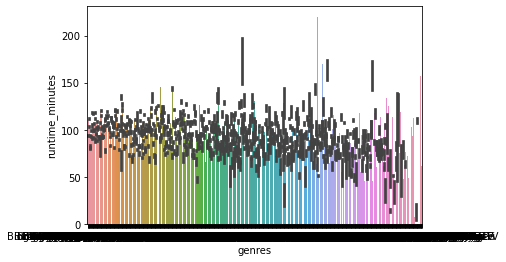

In [64]:
ax = sns.barplot(x="genres", y="runtime_minutes", data=runtime_genres)  

In [45]:
averagerating_genres =  df.drop(["nconst", "tconst", "ordering_x", "category", "numvotes", "primary_title", 
        "original_title", "start_year", "runtime_minutes", "ordering_y", "title", "region", "types",
       "is_original_title", "primary_name", "primary_profession", "known_for_titles"], axis =1) 

In [46]:
averagerating_genres.shape

(2978143, 2)

In [47]:
averagerating_genres.isna().sum()

averagerating    521995
genres            34949
dtype: int64

In [48]:
#Drop the genre rows that have nan values - with more time you could look at the occurance of each genre and then replace
#it with a random genre
averagerating_genres.dropna(subset= ['genres'], inplace= True)

In [42]:
#Calculating averagerating Mean
averagerating_genres['averagerating'].mean() 

6.2436711227924615

In [43]:
averagerating_genres['averagerating'].median() 

6.4

In [44]:
averagerating_genres['averagerating'].mode() 

0    6.2
dtype: float64

In [51]:
averagerating_genres.fillna(6.4)

,averagerating,genres
0,6.4,Comedy
1,6.4,Comedy
2,7.8,Comedy
3,6.4,Comedy
4,3.9,"Drama,Horror"
...,...,...
2975749,6.4,"Documentary,History"
2975759,6.4,"Comedy,Family"
2975779,6.4,Documentary
2975782,6.4,Comedy


In [52]:
averagerating_genres.isna().sum()

averagerating    496749
genres                0
dtype: int64

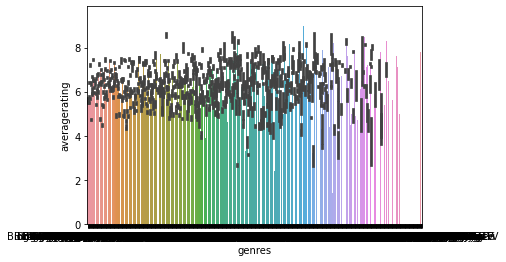

In [29]:
#Visualizing averagerating vs genres
ax = sns.barplot(x="genres", y="averagerating", data=averagerating_genres)  

In [53]:
# Narrow to top 10 genres with highest ratings
averagerating_genres["genre_categories"]=averagerating_genres["genres"].str.split(',')
averagerating_genres2=averagerating_genres.explode("genre_categories")
averagerating_genres_Analysis=averagerating_genres2.groupby("genre_categories") \
                             .median()[["averagerating"]] \
                             .sort_values('averagerating', ascending=False) \
                             .head(10)
averagerating_genres_Analysis.reset_index(inplace=True)
averagerating_genres_Analysis

,genre_categories,averagerating
0,Short,8.8
1,News,7.3
2,Documentary,7.3
3,Biography,7.0
4,History,7.0
5,Sport,6.9
6,Reality-TV,6.9
7,Music,6.9
8,War,6.8
9,Animation,6.5


Text(0.5, 1.0, 'Averagerating For Film Genres')

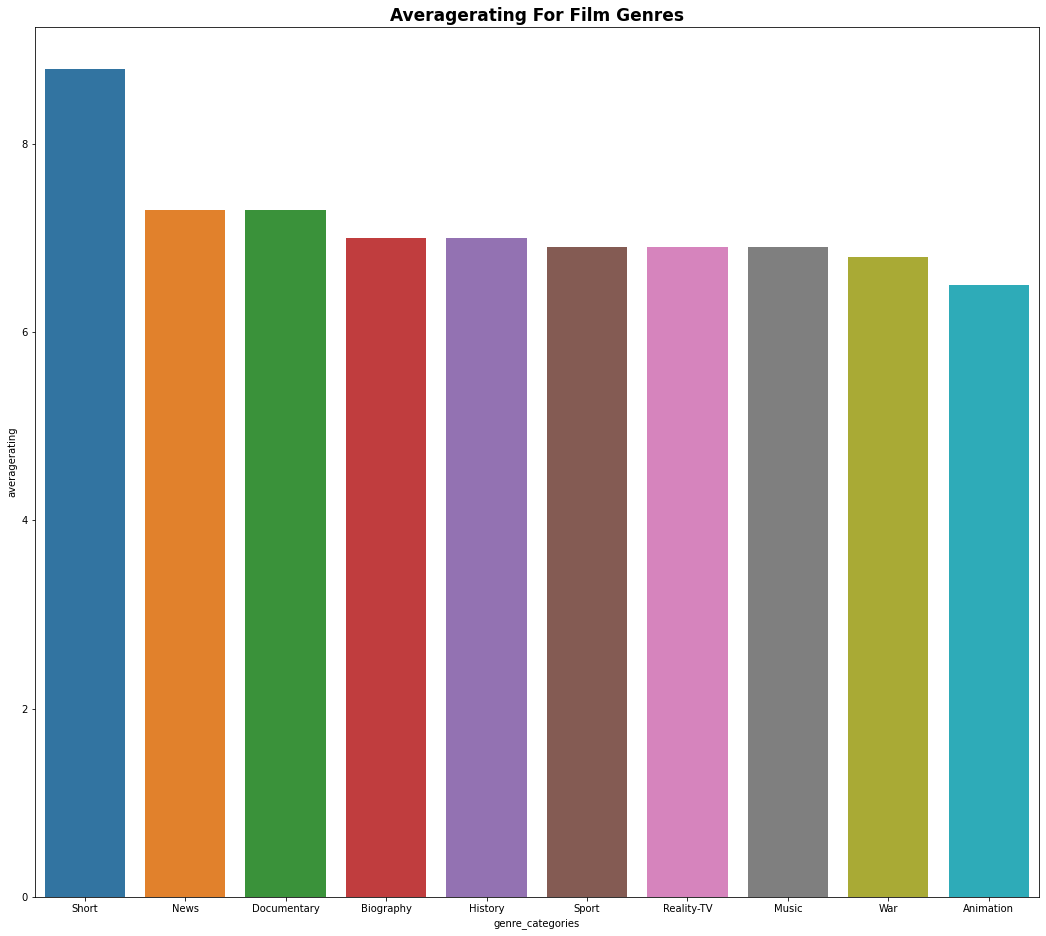

In [54]:
ax = pd.DataFrame(averagerating_genres_Analysis)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genre_categories",y="averagerating",data=ax)
plt.title("Averagerating For Film Genres",fontsize=17,weight="bold")

In [55]:
#Do movies with multiple Genres rate well
multi_genre=averagerating_genres.groupby("genres") \
                             .median()[["averagerating"]] \
                             .sort_values('averagerating', ascending=False) \
                             .head(10)
multi_genre.reset_index(inplace=True)
multi_genre

,genres,averagerating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"Adventure,Documentary,Western",9.2
3,"History,Sport",9.2
4,"Music,Mystery",9.0
5,Game-Show,9.0
6,"Documentary,Family,Romance",8.8
7,"Comedy,Drama,Reality-TV",8.8
8,"Drama,Short",8.8
9,"Drama,Fantasy,War",8.8


Text(0.5, 1.0, 'Averagerating For Multi-Genres')

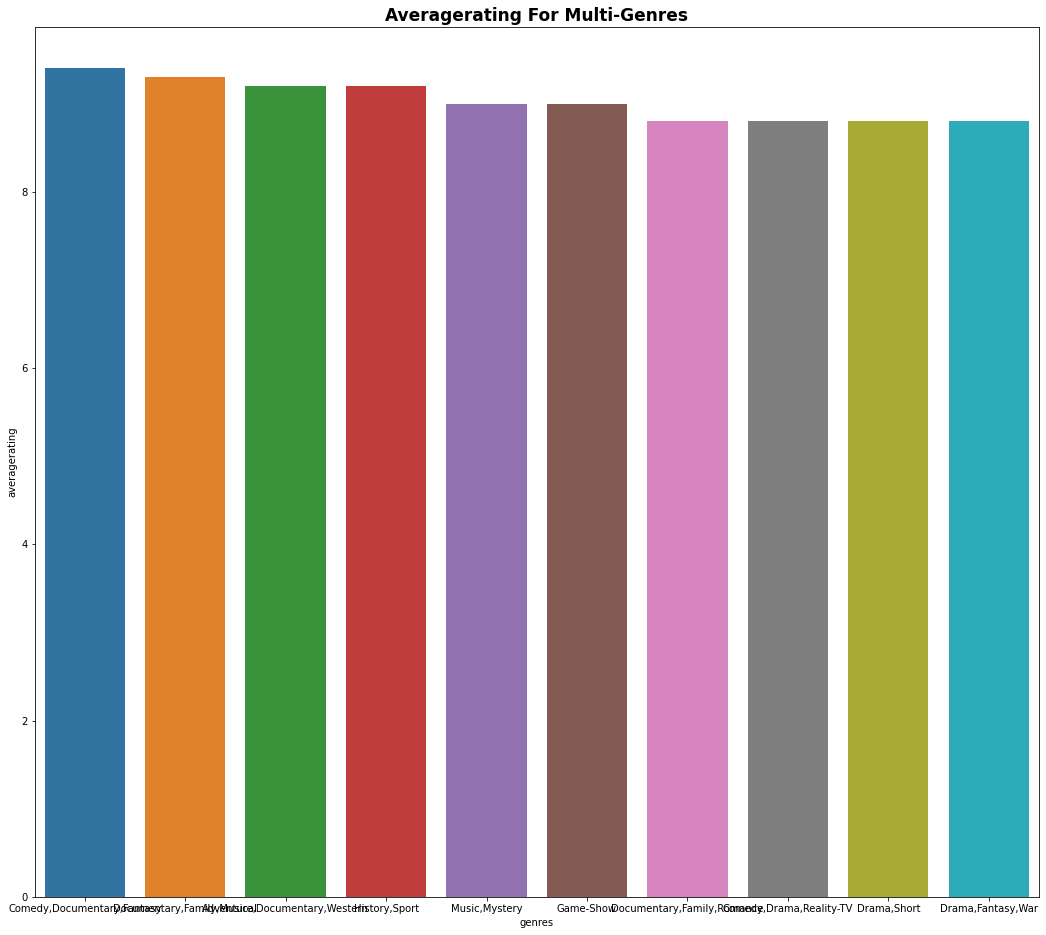

In [56]:
ax = pd.DataFrame(multi_genre)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genres",y="averagerating",data=ax)
plt.title("Averagerating For Multi-Genres",fontsize=17,weight="bold")

From the results, we can see that multi-genre films have better averageratings than single-genre films

# Analysis on Production Budget and Gross Profit
Dataset to be used:
1. "tn.movie_budgets.csv.gz" , 
2. "bom.movie_gross.csv.gz", 
3. tmdb.movies.csv.gz, 
4. rt.movie_info.tsv.gz

In [ ]:
# clean data on all datasets and merge

In [71]:
df_tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [75]:
#convert production_budget to float
df_tn_budget["production_budget"] = df_tn_budget["production_budget"].map(lambda x: str(x))
import string
df_tn_budget["production_budget"] = df_tn_budget["production_budget"].map(lambda x: x.strip(string.punctuation))
df_tn_budget["production_budget"] = df_tn_budget["production_budget"].str.replace(",","").astype(float)

In [76]:
#convert Worldwide_gross to float
df_tn_budget["domestic_gross"] = df_tn_budget["domestic_gross"].map(lambda x: str(x))
import string
df_tn_budget["domestic_gross"] = df_tn_budget["domestic_gross"].map(lambda x: x.strip(string.punctuation))
df_tn_budget["domestic_gross"] = df_tn_budget["domestic_gross"].str.replace(",","").astype(float)

In [77]:
#convert domestic_gross to float
df_tn_budget["worldwide_gross"] = df_tn_budget["worldwide_gross"].map(lambda x: str(x))
import string
df_tn_budget["worldwide_gross"] = df_tn_budget["worldwide_gross"].map(lambda x: x.strip(string.punctuation))
df_tn_budget["worldwide_gross"] = df_tn_budget["worldwide_gross"].str.replace(",","").astype(float)

In [78]:
df_tn_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [84]:
df_bom_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [85]:
#convert foreign_gross to float
df_bom_gross_clean["foreign_gross"] = df_bom_gross_clean["foreign_gross"].map(lambda x: str(x))
import string
df_bom_gross_clean["foreign_gross"] = df_bom_gross_clean["foreign_gross"].map(lambda x: x.strip(string.punctuation))
df_bom_gross_clean["foreign_gross"] = df_bom_gross_clean["foreign_gross"].str.replace(",","").astype(float)

<ipython-input-85-158d5dad45d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bom_gross_clean["foreign_gross"] = df_bom_gross_clean["foreign_gross"].map(lambda x: str(x))
<ipython-input-85-158d5dad45d2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bom_gross_clean["foreign_gross"] = df_bom_gross_clean["foreign_gross"].map(lambda x: x.strip(string.punctuation))
<ipython-input-85-158d5dad45d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [86]:
df_bom_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [87]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [88]:
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [250]:
Genre_budget = pd.merge(df_tn_budget, df_rt_info, on ='id', how ='outer')
Genre_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,1,"May 29, 2009",Up,175000000.0,293004164.0,7.314634e+08,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
2,1,"Mar 7, 2014",Mr. Peabody & Sherman,145000000.0,111506430.0,2.698064e+08,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,1,"Dec 17, 2010",How Do You Know?,120000000.0,30212620.0,4.962818e+07,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
4,1,"Dec 11, 2015",In the Heart of the Sea,100000000.0,25020758.0,8.969331e+07,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7256,1996,NaN,NaN,NaN,NaN,NaN,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
7257,1997,NaN,NaN,NaN,NaN,NaN,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
7258,1998,NaN,NaN,NaN,NaN,NaN,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
7259,1999,NaN,NaN,NaN,NaN,NaN,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [100]:
Genre_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 0 to 7260
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7261 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   synopsis           5928 non-null   object 
 7   rating             6101 non-null   object 
 8   genre              6096 non-null   object 
 9   director           5168 non-null   object 
 10  writer             4464 non-null   object 
 11  theater_date       4443 non-null   object 
 12  dvd_date           4443 non-null   object 
 13  currency           1420 non-null   object 
 14  box_office         1420 non-null   object 
 15  runtime            5960 non-null   object 
 16  studio             2030 

# Genre with Highest Production Budget

In [171]:
genre_production_budget = Genre_budget.drop(["id", "release_date", "movie", "domestic_gross", "worldwide_gross", "synopsis", 
        "rating", "movie", "director", "writer", "theater_date", "dvd_date", "currency",
       "box_office", "runtime", "studio"],axis=1) 

In [172]:
genre_production_budget.head()

,production_budget,genre
0,425000000.0,Action and Adventure|Classics|Drama
1,175000000.0,Action and Adventure|Classics|Drama
2,145000000.0,Action and Adventure|Classics|Drama
3,120000000.0,Action and Adventure|Classics|Drama
4,100000000.0,Action and Adventure|Classics|Drama


In [173]:
genre_production_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 0 to 7260
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  5782 non-null   float64
 1   genre              6096 non-null   object 
dtypes: float64(1), object(1)
memory usage: 170.2+ KB


In [174]:
genre_production_budget.isna().sum()

production_budget    1479
genre                1165
dtype: int64

In [179]:
#Drop genre rows with NaN
genre_production_budget.dropna(subset= ['genre'], inplace= True)

In [136]:
#Check for Data symmetry production budget to see if I can apply .fillna(median)
genre_production_budget['production_budget'].mean()

31457100.292603806

In [137]:
genre_production_budget['production_budget'].median()

17000000.0

In [138]:
genre_production_budget['production_budget'].mode()

0    20000000.0
dtype: float64

In [139]:
genre_production_budget['production_budget'].std()

41333596.53894441

In [178]:
#From above we cannot fillna with Median, I will therefore use 
genre_production_budget.dropna(subset= ['production_budget'], inplace= True)

In [180]:
genre_production_budget.isna().sum()

production_budget    0
genre                0
dtype: int64

Text(0.5, 1.0, 'Budget by Genre')

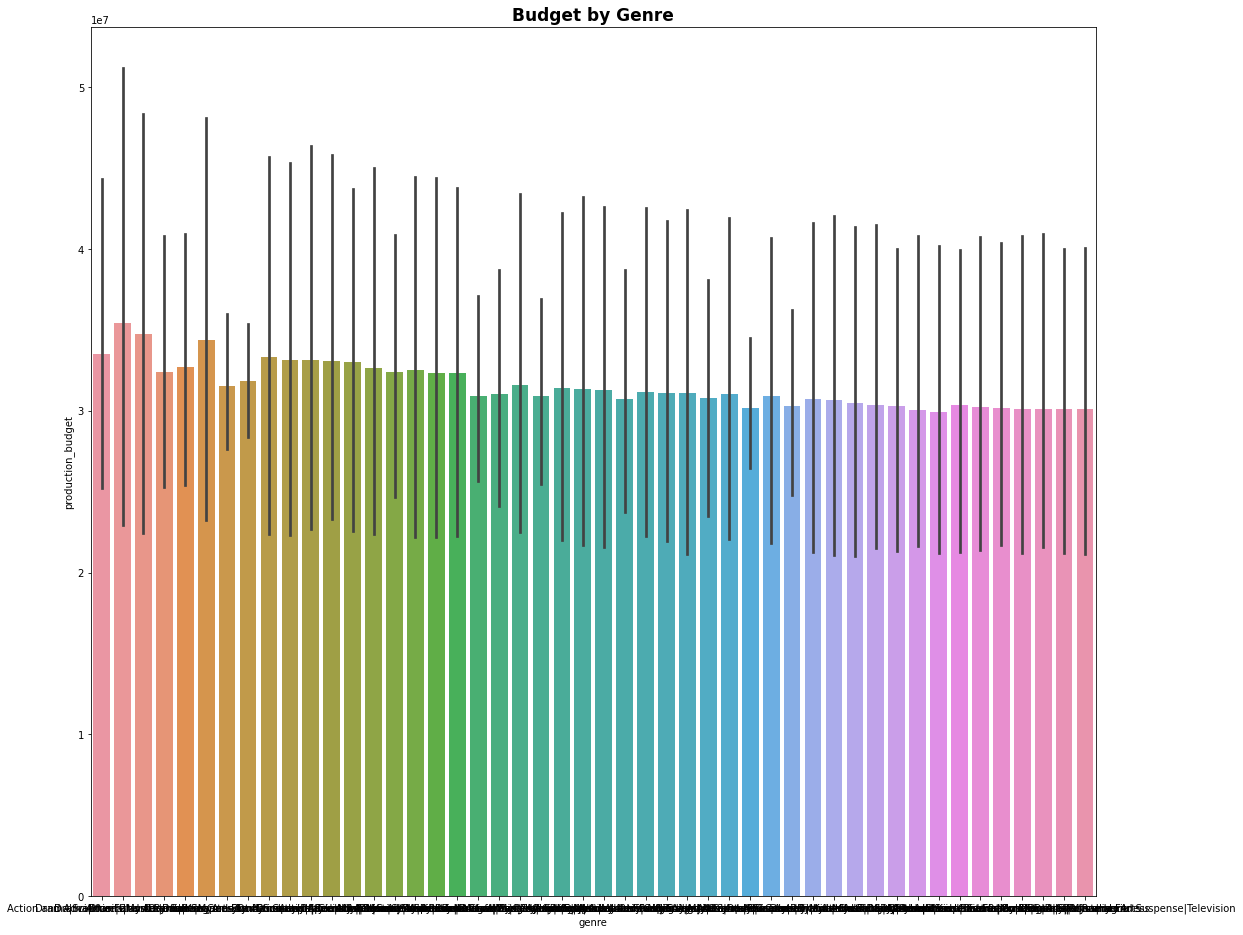

In [144]:
ax = pd.DataFrame(genre_production_budget)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genre",y="production_budget",data=ax)
plt.title("Budget by Genre",fontsize=17,weight="bold")

In [320]:
#Genre with Highest Production Budget
Budget_Genre_Analysis_plot = genre_production_budget.nlargest(5, ["production_budget"], keep='all')
Budget_Genre_Analysis_plot

,production_budget,genre
0,425000000.0,Action and Adventure|Classics|Drama
116,350000000.0,Drama|Science Fiction and Fantasy
232,317000000.0,Drama|Musical and Performing Arts
290,306000000.0,Drama|Mystery and Suspense
348,300000000.0,Drama|Romance
406,300000000.0,Drama|Kids and Family
522,300000000.0,Comedy


Text(0.5, 1.0, 'Budget by Genre')

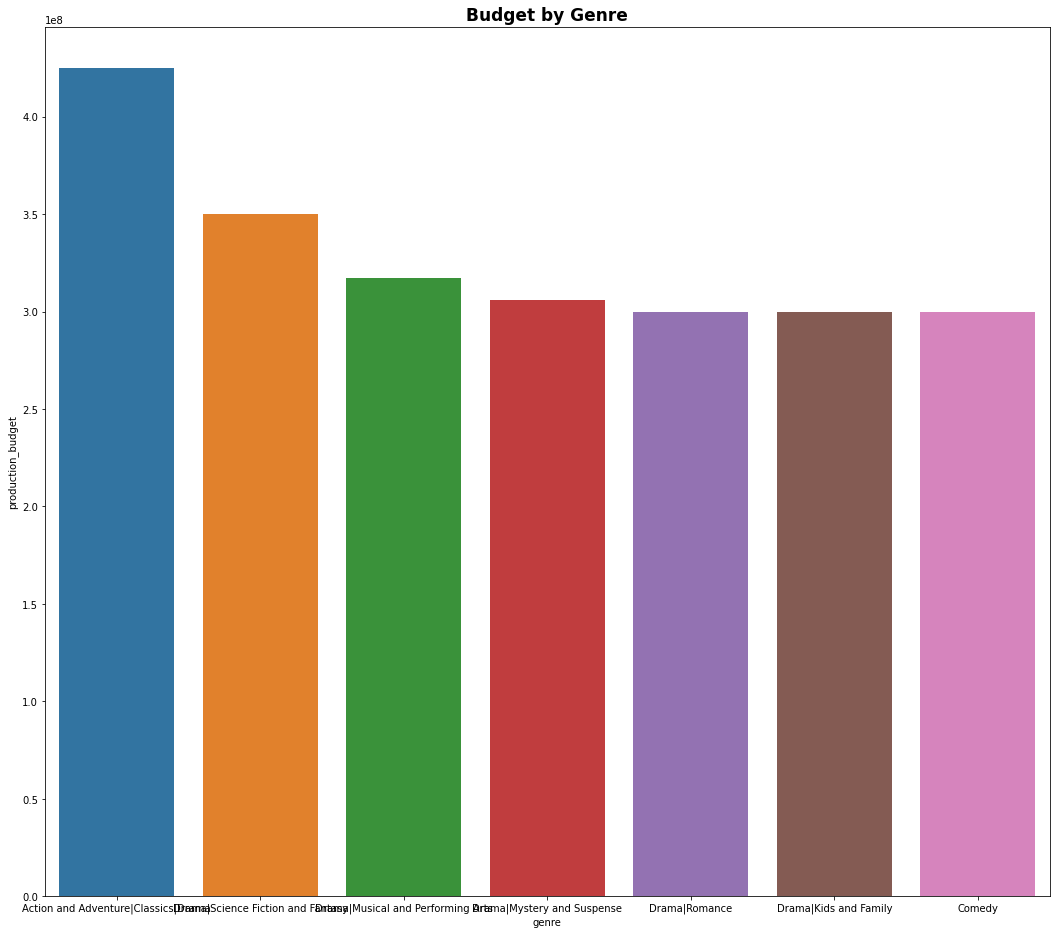

In [319]:
ax_bg = pd.DataFrame(Budget_Genre_Analysis_plot)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genre",y="production_budget",data=ax_bg)
plt.title("Budget by Genre",fontsize=17,weight="bold")

# How does Production Budget correlate to the Runtime?

In [208]:
Budget_runtime = Genre_budget.drop(["id", "release_date", "movie", "domestic_gross", "worldwide_gross", "synopsis", 
        "rating", "movie", "director", "writer", "theater_date", "dvd_date", "currency",
       "box_office", "genre", "studio"],axis=1) 

In [188]:
Budget_runtime

,production_budget,runtime
0,425000000.0,104 minutes
1,175000000.0,104 minutes
2,145000000.0,104 minutes
3,120000000.0,104 minutes
4,100000000.0,104 minutes
...,...,...
7256,NaN,106 minutes
7257,NaN,88 minutes
7258,NaN,111 minutes
7259,NaN,101 minutes


In [190]:
Budget_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 0 to 7260
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  5782 non-null   float64
 1   runtime            5960 non-null   object 
dtypes: float64(1), object(1)
memory usage: 170.2+ KB


In [213]:
Budget_runtime.dropna(subset= ['runtime'], inplace= True)

In [193]:
Budget_runtime.dropna(subset= ['production_budget'], inplace= True)

In [195]:
Budget_runtime.isna().sum()

production_budget    0
runtime              0
dtype: int64

In [196]:
group_ratings_budget_rating = Budget_runtime.groupby('runtime').mean() 

In [198]:
group_ratings_budget_rating.isna().sum()

production_budget    0
dtype: int64

In [216]:
Budget_runtime_analysis = group_ratings_budget_rating.sort_values(by= "production_budget", ascending=False)
Budget_runtime_analysis.head()

,production_budget
runtime,
128 minutes,3.449806e+07
200 minutes,3.437643e+07
129 minutes,3.297431e+07
82 minutes,3.282316e+07
127 minutes,3.255309e+07


<AxesSubplot:xlabel='runtime', ylabel='production_budget'>

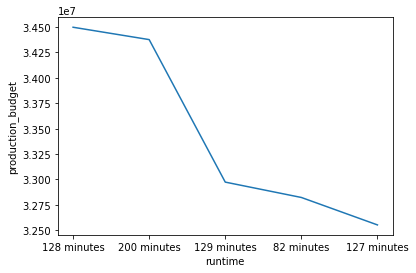

In [222]:
Budget_runtime_analysis_plot = Budget_runtime_analysis[:5]
sns.lineplot(data=Budget_runtime_analysis_plot, x="runtime", y="production_budget")

In [ ]:
# High budget does not really = More Runtime or Vice-versa

# How does Production Budget correlate with Gross Profit

In [230]:
Budget_gross = Genre_budget.drop(["id", "release_date", "movie", "domestic_gross", "synopsis", 
        "rating", "genre", "movie", "director", "writer", "theater_date", "dvd_date", "currency",
       "box_office", "genre", "runtime", "studio"],axis=1) 

In [231]:
Budget_gross.head()

,production_budget,worldwide_gross
0,425000000.0,2.776345e+09
1,175000000.0,7.314634e+08
2,145000000.0,2.698064e+08
3,120000000.0,4.962818e+07
4,100000000.0,8.969331e+07


In [232]:
Budget_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 0 to 7260
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  5782 non-null   float64
 1   worldwide_gross    5782 non-null   float64
dtypes: float64(2)
memory usage: 170.2 KB


In [233]:
Budget_gross.isna().sum()

production_budget    1479
worldwide_gross      1479
dtype: int64

In [234]:
Budget_gross.dropna(subset= ['production_budget'], inplace= True)

In [235]:
Budget_gross.dropna(subset= ['worldwide_gross'], inplace= True)

In [236]:
Budget_gross.isna().sum()

production_budget    0
worldwide_gross      0
dtype: int64

<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

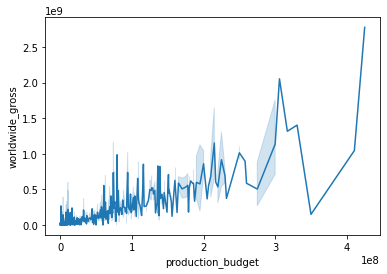

In [238]:
sns.lineplot(data=Budget_gross, x="production_budget", y="worldwide_gross")

In [239]:
Budget_gross.corr(method = "pearson")

,production_budget,worldwide_gross
production_budget,1.000000,0.748306
worldwide_gross,0.748306,1.000000


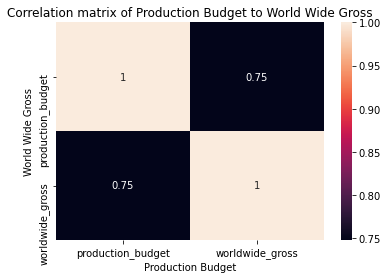

In [246]:
correlation_mat = Budget_gross.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of Production Budget to World Wide Gross")
plt.xlabel("Production Budget")
plt.ylabel("World Wide Gross")
plt.show()

From the above heatmap, we can see that there's a strong correlatin between Production Budget and Gross profit

# Which are the Top Profitable Genres

In [286]:
Profitable_Genre = Genre_budget.drop(["id", "release_date", "movie", "domestic_gross", "synopsis", 
        "rating", "movie", "director", "writer", "theater_date", "dvd_date", "currency",
       "box_office", "runtime", "studio"],axis=1) 

In [287]:
Profitable_Genre.head()

,production_budget,worldwide_gross,genre
0,425000000.0,2.776345e+09,Action and Adventure|Classics|Drama
1,175000000.0,7.314634e+08,Action and Adventure|Classics|Drama
2,145000000.0,2.698064e+08,Action and Adventure|Classics|Drama
3,120000000.0,4.962818e+07,Action and Adventure|Classics|Drama
4,100000000.0,8.969331e+07,Action and Adventure|Classics|Drama


In [288]:
Profitable_Genre["Est_Gross_Profit"] = Profitable_Genre.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)

In [289]:
Profitable_Genre

,production_budget,worldwide_gross,genre,Est_Gross_Profit
0,425000000.0,2.776345e+09,Action and Adventure|Classics|Drama,2.351345e+09
1,175000000.0,7.314634e+08,Action and Adventure|Classics|Drama,5.564634e+08
2,145000000.0,2.698064e+08,Action and Adventure|Classics|Drama,1.248064e+08
3,120000000.0,4.962818e+07,Action and Adventure|Classics|Drama,-7.037182e+07
4,100000000.0,8.969331e+07,Action and Adventure|Classics|Drama,-1.030669e+07
...,...,...,...,...
7256,NaN,NaN,Action and Adventure|Horror|Mystery and Suspense,NaN
7257,NaN,NaN,Comedy|Science Fiction and Fantasy,NaN
7258,NaN,NaN,Classics|Comedy|Drama|Musical and Performing Arts,NaN
7259,NaN,NaN,Comedy|Drama|Kids and Family|Sports and Fitness,NaN


In [290]:
Profitable_Genre_Analysis = Profitable_Genre.drop(["production_budget", "worldwide_gross"], axis=1)

In [291]:
Profitable_Genre_Analysis

,genre,Est_Gross_Profit
0,Action and Adventure|Classics|Drama,2.351345e+09
1,Action and Adventure|Classics|Drama,5.564634e+08
2,Action and Adventure|Classics|Drama,1.248064e+08
3,Action and Adventure|Classics|Drama,-7.037182e+07
4,Action and Adventure|Classics|Drama,-1.030669e+07
...,...,...
7256,Action and Adventure|Horror|Mystery and Suspense,NaN
7257,Comedy|Science Fiction and Fantasy,NaN
7258,Classics|Comedy|Drama|Musical and Performing Arts,NaN
7259,Comedy|Drama|Kids and Family|Sports and Fitness,NaN


In [292]:
Profitable_Genre_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7261 entries, 0 to 7260
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             6096 non-null   object 
 1   Est_Gross_Profit  5782 non-null   float64
dtypes: float64(1), object(1)
memory usage: 490.2+ KB


In [293]:
Profitable_Genre_Analysis.dropna(subset= ['genre'], inplace= True)

In [294]:
Profitable_Genre_Analysis['Est_Gross_Profit'].mean()

61639618.13927335

In [295]:
Profitable_Genre_Analysis['Est_Gross_Profit'].median()

9044657.0

In [296]:
Profitable_Genre_Analysis['Est_Gross_Profit'].mode()

0   -2000000.0
dtype: float64

In [297]:
#From the above we can see that the data is not symmetrical so we dropna 
Profitable_Genre_Analysis.dropna(subset= ['Est_Gross_Profit'], inplace= True)

In [298]:
Profitable_Genre_Analysis.isna().sum()

genre               0
Est_Gross_Profit    0
dtype: int64

In [315]:
Profitable_Genre_Analysis_plot = Profitable_Genre_Analysis.nlargest(5, ["Est_Gross_Profit"], keep='all')

In [316]:
Profitable_Genre_Analysis_plot

,genre,Est_Gross_Profit
0,Action and Adventure|Classics|Drama,2.351345e+09
2436,Classics|Comedy|Musical and Performing Arts,2.008208e+09
348,Drama|Romance,1.748134e+09
290,Drama|Mystery and Suspense,1.747311e+09
1914,Action and Adventure|Mystery and Suspense,1.433855e+09


Text(0.5, 1.0, 'Profitable_Genre')

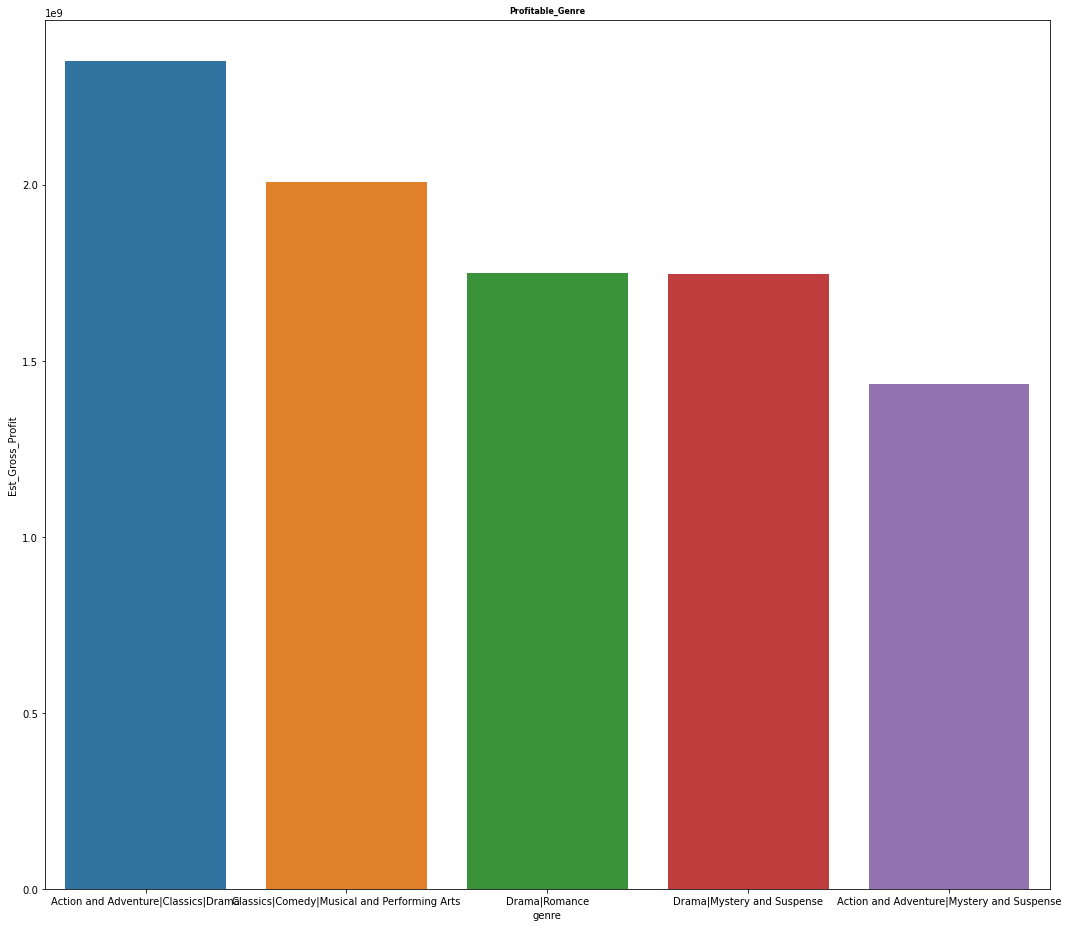

In [317]:
ax_pg = pd.DataFrame(Profitable_Genre_Analysis_plot)
plt.figure(figsize=(18,16))
ax=sns.barplot(x="genre",y="Est_Gross_Profit",data=ax_pg)
plt.title("Profitable_Genre",fontsize=8,weight="bold")

# What is the Correlation between Foreign and Domestic Gross

In [337]:
df_bom_gross_clean.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [340]:
df_bom_gross_clean.drop(["title", "studio", "year"],axis=1)

,domestic_gross,foreign_gross
0,415000000.0,6.520000e+08
1,334200000.0,6.913000e+08
2,296000000.0,6.643000e+08
3,292600000.0,5.357000e+08
4,238700000.0,5.139000e+08
...,...,...
3382,6200.0,2.874585e+07
3383,4800.0,2.874585e+07
3384,2500.0,2.874585e+07
3385,2400.0,2.874585e+07


In [343]:
df_bom_gross_clean.corr()

,domestic_gross,foreign_gross,year
domestic_gross,1.000000,0.777175,0.018366
foreign_gross,0.777175,1.000000,0.064951
year,0.018366,0.064951,1.000000


In [344]:
from scipy import stats
stats.pearsonr(df_bom_gross_clean['domestic_gross'], df_bom_gross_clean['foreign_gross'])

(0.7771748611125854, 0.0)

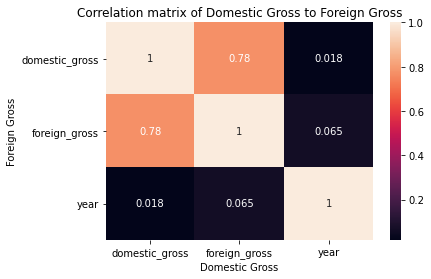

In [341]:
correlation_mat_gross = df_bom_gross_clean.corr()
sns.heatmap(correlation_mat_gross, annot = True)
plt.title("Correlation matrix of Domestic Gross to Foreign Gross")
plt.xlabel("Domestic Gross")
plt.ylabel("Foreign Gross")
plt.show()

There's a strong linear relationship between Domestic gross and Foreign gross meaning the two variables are correlated i.e. a film that performs well domestically will most likely perform well internationally